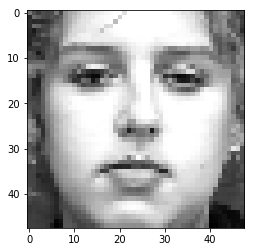

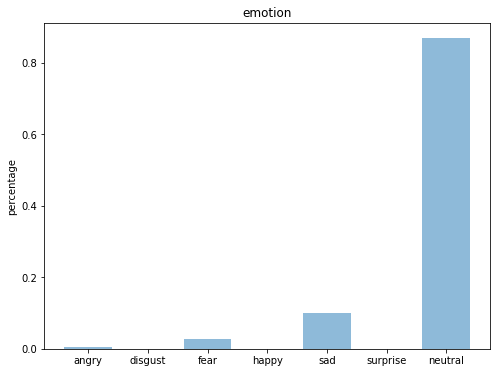

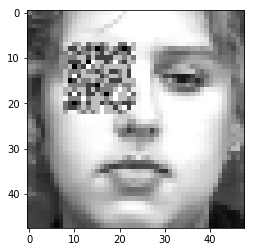

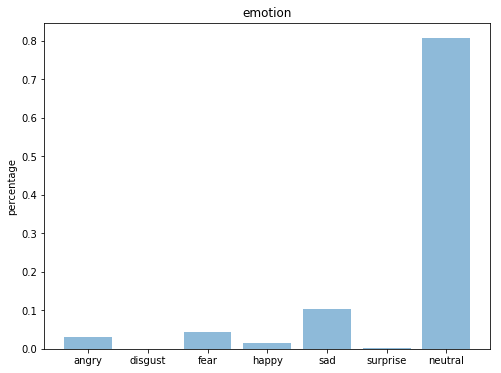

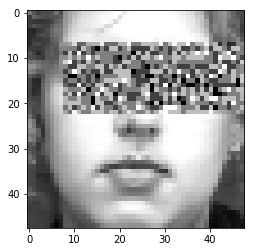

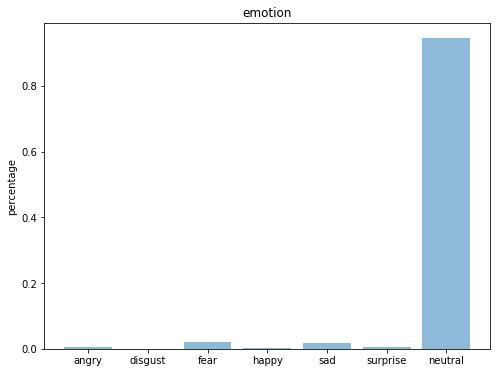

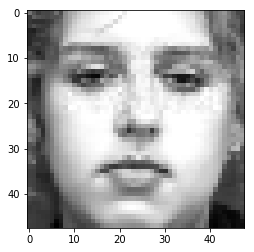

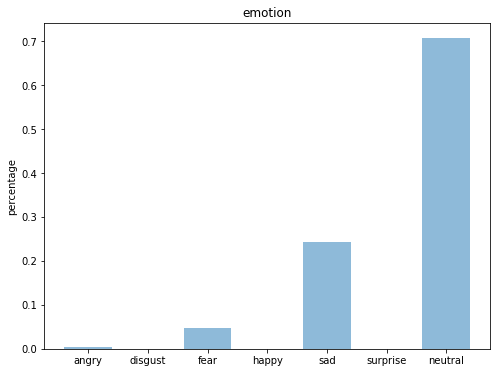

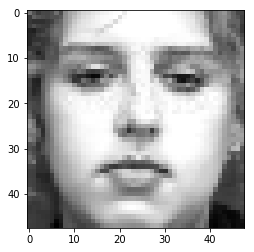

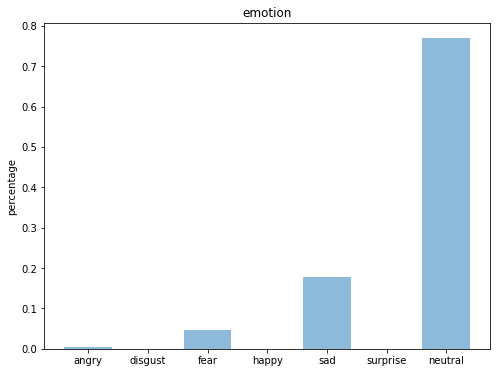

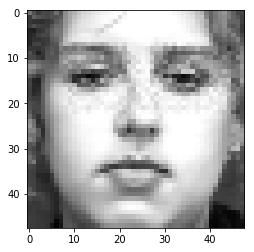

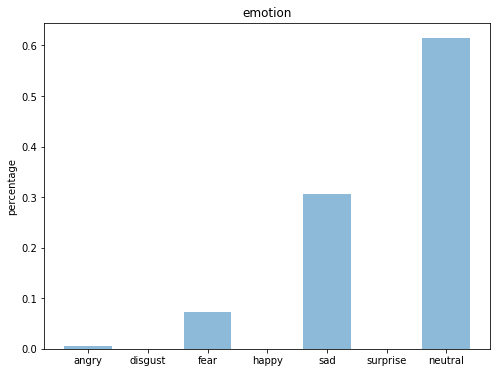

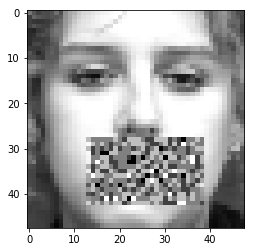

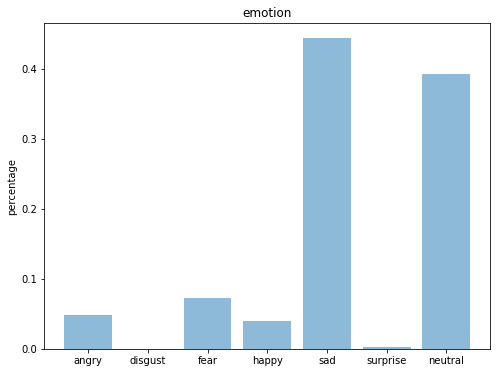

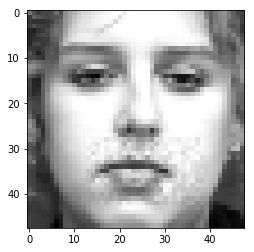

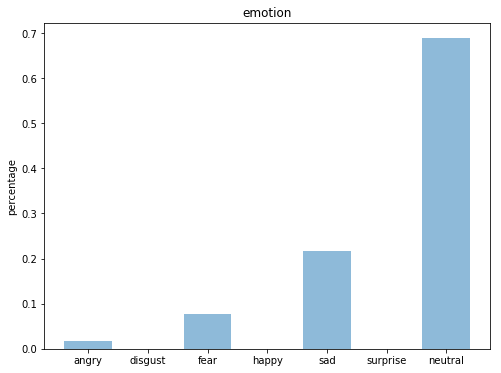

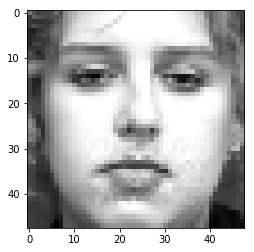

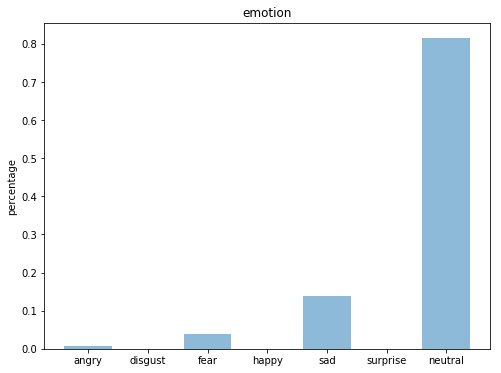

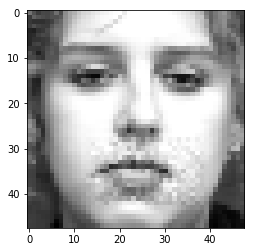

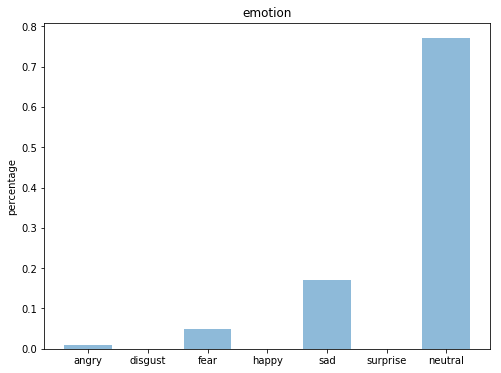

In [2]:
import tensorflow as tf

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from keras.layers import Dense, Activation, Dropout, Flatten
from keras.losses import categorical_crossentropy
from keras.models import load_model
from keras.callbacks import ReduceLROnPlateau, TensorBoard, EarlyStopping, ModelCheckpoint
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt
import cv2

width, height = 48, 48
model = load_model('../models/MODEL_I_Aug.h5')

def emotion_analysis(emotions):
    # Function for drawing bar chart for emotion preditions
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    plt.figure(figsize=[8,6])
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    plt.show()
    
def get_prediction(path):
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (width,height))
    plt.imshow(img, cmap='gray')
    emotion = keras.utils.to_categorical(5, 7)
    x_test, y_test = [], []
    x_test.append(np.array(img))
    y_test.append(emotion)
    x_test = np.array(x_test, 'float32')
    y_test = np.array(y_test, 'float32')
    x_test_mean = np.mean(x_test)
    x_test_std = np.std(x_test)
    x_test -= x_test_mean
    x_test /= x_test_std
    x_test = x_test.reshape(x_test.shape[0], width, height, 1)
    x_test = x_test.astype('float32')
    p = model.predict(x_test)
    testing_img = np.array(x_test[0], 'float32')
    testing_img = testing_img.reshape([width, height]);
    emotion_analysis(p[0])
    
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/original.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/s&p_one_eye.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/s&p_eyes.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/speckle_eyes.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/poisson_eyes.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/gaussian_eyes.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/s&p_mouth.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/speckle_mouth.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/poisson_mouth.png")
get_prediction("/home/connor/4thYear/Dissertation/thesis/images/subject5/gaussian_mouth.png")